## Uygulamalı Veri Bilimi ve Makine Öğrenimi Eğitim Kampı 

### Kodluyoruz Ağustos-Eylül 2019 Ankara

### 2. hafta

Geçtiğimiz hafta istatistik temellerine değindik

Anahtar kelimeler:
* Z Table
* Normal dağılım (Gaussian) (çan)
* Uniform dağılım
* Poisson dağılımı
* Probability Density Function (PDF)
* Cumulative Distribution Function (CDF)


## IRIS dataseti

### Imports

In [1]:
import statsmodels.stats.api as sms # İstatistik Kütüphanesi
import os # Operating system kütüphanesi, çalıştığımız directory'yi değiştiririz
import pandas as pd # Dataframe adında python'un özel tablo kütüphanesi
import seaborn as sns
from sklearn import datasets #Sckit-Learning kütüphanesindeki hazır 'toy' datasetler
import matplotlib.pyplot as plt # Plot etmek için bu şekilde çağırıyoruz
import numpy as np

In [2]:
#os.chdir(r"C:\Users\neutr\Desktop\kodluyoruz bootcamp") #directory değiştirebiliyoruz ama şimdilik gerek yok
iris = sns.load_dataset("iris") #hazır datasetini yüklüyoruz

In [3]:
iris.head() # verisetinin ilk 5 terimi ve headerların ismine bakıyoruz (pandas dataframe özelliği)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'sepal width (cm)')

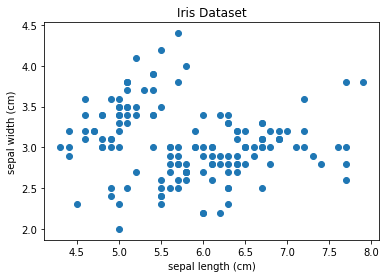

In [4]:
fig, ax = plt.subplots() #figür oluşturuyoruz
ax.scatter(iris['sepal_length'],iris['sepal_width']) # scatter plot yaptırarak yaprak uzunluğu ve genişliğini alıyoruz
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

In [5]:
colors={'setosa' : 'r', 'versicolor' : 'g', 'virginica' : 'b'}


Text(0, 0.5, 'sepal width (cm)')

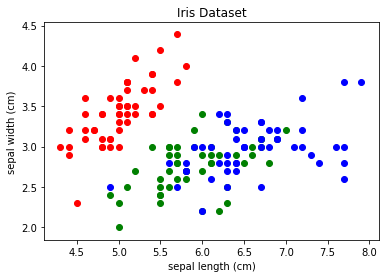

In [6]:
fig, ax = plt.subplots() #Diğer figür 3 türe de hakim ancak tek renk var, çiçeklerin rengine göre plot edelim
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i],iris['sepal_width'][i],color=colors[iris['species'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

Text(0, 0.5, 'sepal width (cm)')

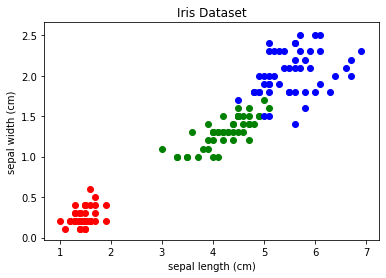

In [7]:
fig, ax = plt.subplots()
for i in range(len(iris['petal_length'])):
    ax.scatter(iris['petal_length'][i],iris['petal_width'][i],color=colors[iris['species'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

In [8]:
columns = iris.columns.drop(['species'])

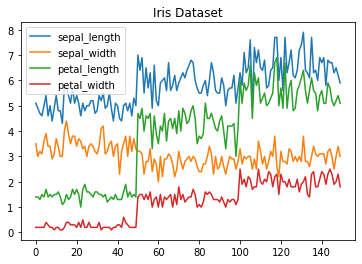

In [9]:
x_data = range (0, iris.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, iris[column])
ax.set_title('Iris Dataset')
ax.legend(columns)


In [10]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Text(0, 0.5, 'Count')

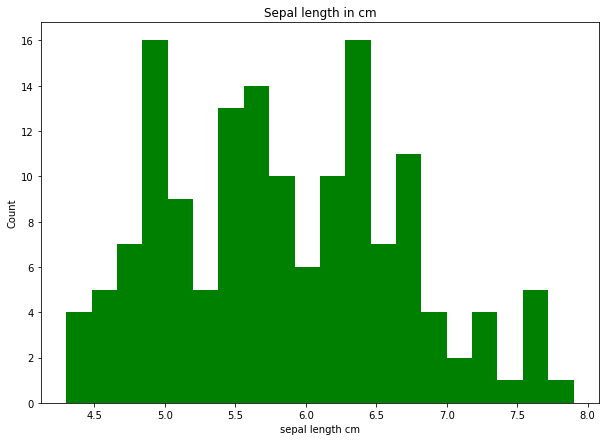

In [11]:
plt.figure(figsize=(10,7))
plt.hist(iris['sepal_length'],bins=20, color='green')
plt.title("Sepal length in cm")
plt.xlabel("sepal length cm")
plt.ylabel("Count")

In [12]:
test_array=[3,5,7,8,9,10,11,13,124]
print("mean: " + str(np.mean(test_array)))
print("median: " + str(np.median(test_array)))
#median outlierlara karşı daha robust, mean outlier durumlarına karşı hassas

mean: 21.11111111111111
median: 9.0


In [13]:
# Quetile bulmak:
# elimizdeki veriyi 4 çeyreğe bölüyoruz
test_array=[3,5,7,8,9,10,11,13,124,35,36,23,21,12,13,14,15,60,32,34,1,3,5,8,6,7]

In [14]:
print("1. Quertile %25: " + str(np.percentile(q=25, a=test_array))) 
print("2. Quertile %50: " + str(np.percentile(q=50, a=test_array))) 
print("3. Quertile %75: " + str(np.percentile(q=75, a=test_array))) 
print("4. Quertile %100: " + str(np.percentile(q=100, a=test_array)))
Q3=np.percentile(q=75, a=test_array)
Q1=np.percentile(q=25, a=test_array)
IQR=Q3-Q1
print("IQR (Inter Quertile Range) : " + str(IQR))
outlier=[]
outlier_min=Q1-1.5*IQR
outlier_max=Q3+1.5*IQR
for i in test_array:
    if i<outlier_min or i>outlier_max:
        outlier.append(i)
print("Bu sayıdan küçükse outlier diyebiliriz: " +str(outlier_min))
print("Bu sayıdan büyükse outlier diyebiliriz: " +str(outlier_max))
print(outlier)

1. Quertile %25: 7.0
2. Quertile %50: 11.5
3. Quertile %75: 22.5
4. Quertile %100: 124.0
IQR (Inter Quertile Range) : 15.5
Bu sayıdan küçükse outlier diyebiliriz: -16.25
Bu sayıdan büyükse outlier diyebiliriz: 45.75
[124, 60]


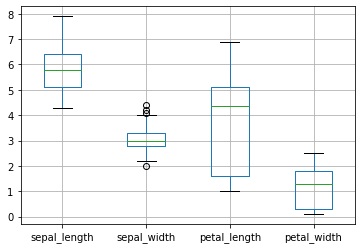

In [15]:
plt.figure()
iris.boxplot()

Text(0, 0.5, 'Count')

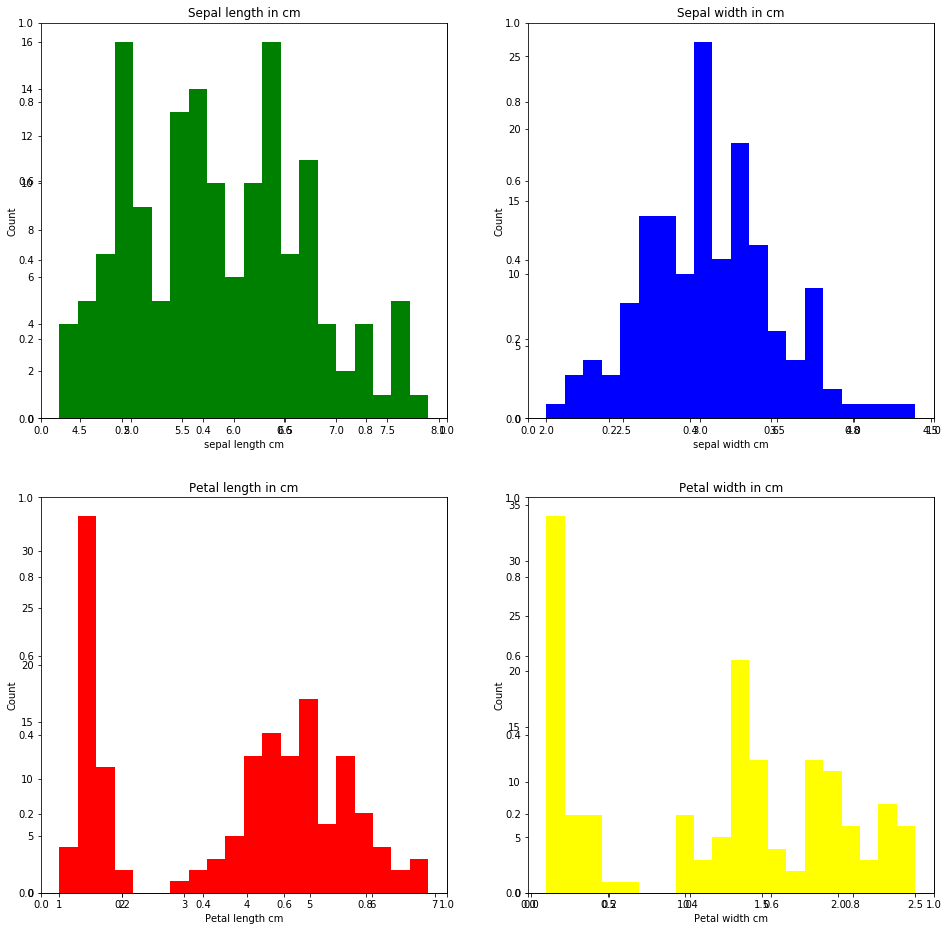

In [16]:
f, axs = plt.subplots(2,2,figsize=(16,16))

ax = f.add_subplot(221)
plt.hist(iris['sepal_length'],bins=20, color='green')
plt.title("Sepal length in cm")
plt.xlabel("sepal length cm")
plt.ylabel("Count")

ax2 = f.add_subplot(222)
plt.hist(iris['sepal_width'],bins=20, color='blue')
plt.title("Sepal width in cm")
plt.xlabel("sepal width cm")
plt.ylabel("Count")

ax2 = f.add_subplot(223)
plt.hist(iris['petal_length'],bins=20, color='red')
plt.title("Petal length in cm")
plt.xlabel("Petal length cm")
plt.ylabel("Count")

ax2 = f.add_subplot(224)
plt.hist(iris['petal_width'],bins=20, color='yellow')
plt.title("Petal width in cm")
plt.xlabel("Petal width cm")
plt.ylabel("Count")

In [17]:
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [20]:
iris_corr=iris.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


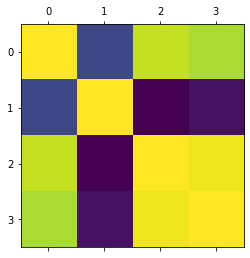

In [26]:
plt.matshow(corr)
plt.show()

In [32]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10,10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


# Titanic Veriseti

In [43]:
import os
os.chdir(r"C:\Users\neutr\Desktop\kodluyoruz bootcamp") #verisetini nereye indirdiyeseniz adresi giriniz

In [54]:
titanic=pd.read_csv('titanic_train.csv')
#data=pd.read_csv('https://raw.githubusercontent.com/caglarmert/UVBMOB/master/titanic_train.csv') # veriseti yoksa internetten çekmek için


In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
survived_gender=pd.crosstab(index=titanic['Survived'],columns=titanic['Sex'])
survived_gender.index = ["died","survived"]
survived_gender

Sex,female,male
died,81,468
survived,233,109


In [62]:
survived_class=pd.crosstab(index=titanic['Survived'],columns=titanic['Pclass'])
survived_class.index = ["died","survived"]
survived_class

Pclass,1,2,3
died,80,97,372
survived,136,87,119


In [67]:
char_cabin = titanic["Cabin"].astype(str)

In [69]:
new_Cabin = np.array([cabin[0] for cabin in char_cabin])
titanic["Cabin"] = pd.Categorical(new_Cabin)

In [70]:
titanic["Cabin"]

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin, Length: 891, dtype: category
Categories (9, object): [A, B, C, D, ..., F, G, T, n]

In [75]:
survived_count=pd.crosstab(index=titanic['Survived'],columns=titanic['Cabin'])
survived_count.index = ["died","survived"]
survived_count

Cabin,A,B,C,D,E,F,G,T,n
died,8,12,24,8,8,5,2,1,481
survived,7,35,35,25,24,8,2,0,206


In [84]:
survived_class=pd.crosstab(index=titanic['Survived'],
                           columns=titanic['Pclass'],
                          margins=True)
survived_class.columns = ["Class1","Class2","Class3","Row_Total"]
survived_class.index = ["Died","Survived","Column_Total"]
survived_class

,Class1,Class2,Class3,Row_Total
Died,80,97,372,549
Survived,136,87,119,342
Column_Total,216,184,491,891


In [90]:
survived_class/survived_class.loc["Column_Total","Row_Total"]

,Class1,Class2,Class3,Row_Total
Died,0.089787,0.108866,0.417508,0.616162
Survived,0.152637,0.097643,0.133558,0.383838
Column_Total,0.242424,0.206510,0.551066,1.000000


In [94]:
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])
}
df=pd.DataFrame(d)


In [113]:
print(df.count())


Name      12
Age       12
Rating    12
dtype: int64


In [114]:
print(df.sum())


Name      TomJamesRickyVinSteveSmithJackLeeDavidGasperBe...
Age                                                     382
Rating                                                44.92
dtype: object


In [115]:
print(df.mean())


Age       31.833333
Rating     3.743333
dtype: float64


In [116]:
print(df.median())


Age       29.50
Rating     3.79
dtype: float64


In [117]:
print(df.mode())


      Name   Age  Rating
0   Andres  23.0    2.56
1   Betina  25.0    2.98
2    David  30.0    3.20
3   Gasper   NaN    3.24
4     Jack   NaN    3.65
5    James   NaN    3.78
6      Lee   NaN    3.80
7    Ricky   NaN    3.98
8    Smith   NaN    4.10
9    Steve   NaN    4.23
10     Tom   NaN    4.60
11     Vin   NaN    4.80


In [118]:
print(df.std())


Age       9.232682
Rating    0.661628
dtype: float64


In [119]:
print(df.min())


Name      Andres
Age           23
Rating      2.56
dtype: object


In [120]:
print(df.max())

Name      Vin
Age        51
Rating    4.8
dtype: object


In [123]:
print(df.describe(include='all'))

       Name        Age     Rating
count    12  12.000000  12.000000
unique   12        NaN        NaN
top     Lee        NaN        NaN
freq      1        NaN        NaN
mean    NaN  31.833333   3.743333
std     NaN   9.232682   0.661628
min     NaN  23.000000   2.560000
25%     NaN  25.000000   3.230000
50%     NaN  29.500000   3.790000
75%     NaN  35.500000   4.132500
max     NaN  51.000000   4.800000


In [128]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

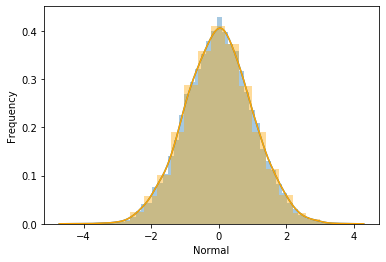

In [132]:
veri_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(veri_normal)
ax = sns.distplot(veri_normal, bins=20, kde=True, color= "orange")

ax.set(xlabel='Normal', ylabel='Frequency')

In [133]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
               157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
               203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
       216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

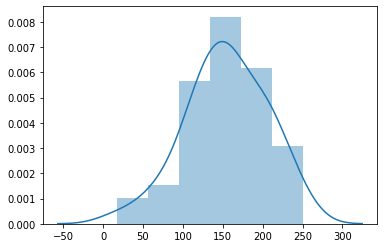

In [134]:
sns.distplot(olcumler)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal')]

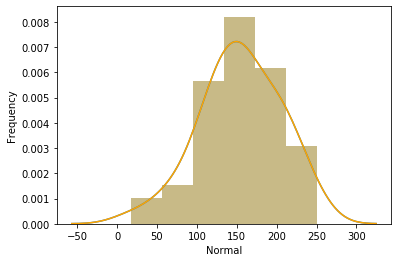

In [139]:
ax = sns.distplot(olcumler)
ax = sns.distplot(olcumler, bins=6, kde=True, color= "orange")

ax.set(xlabel='Normal', ylabel='Frequency')

In [140]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

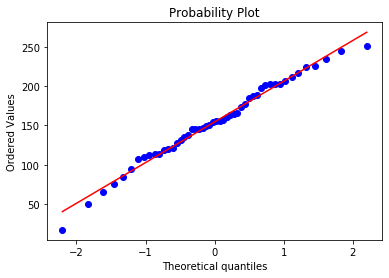

In [145]:
import pylab
stats.probplot(olcumler, dist='norm', plot=pylab)
pylab.show()

In [155]:
import statsmodels.api as sm


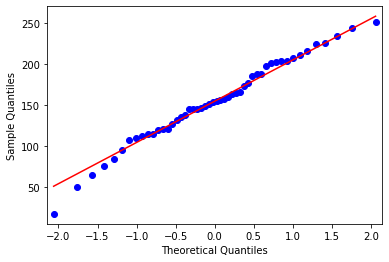

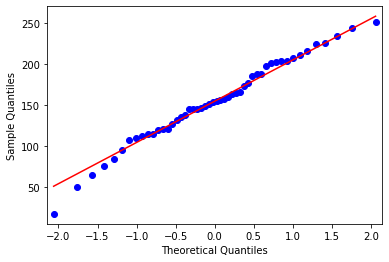

In [154]:
sm.qqplot(olcumler, line ='s')

In [164]:
from scipy.stats import shapiro
stat, p = shapiro(olcumler)

print('Statistics = %2.1f %%, p = %2.1f %%' % (stat*100,p*100))

Statistics = 98.5 %, p = 78.5 %
